# Project Python: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Required libraries

In [1]:
# libraries for data manipulation
import numpy as np
import pandas as pd

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
df = pd.read_csv('foodhub_order.csv')

df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: The structure consists of 1898 data entries and 9 columns. There doesn´t appear to be null values. Columns 0 and 1 data types could be changed since they don´t represent numerical values.

In [4]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [5]:
df.duplicated().sum()

0

#### There are no null or duplicated values

In [6]:
cust_id_str = df["customer_id"].astype(str)
ord_id_str = df["order_id"].astype(str)

In [7]:
df["customer_id"] = cust_id_str
df["order_id"] = ord_id_str

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 133.6+ KB


#### Observations: The data types for columns 0 and 1 have been changed for convenience


In [9]:
df["rating"].value_counts()


Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [10]:
df["rating"].value_counts(1)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

#### Observations: 38% of the orders where not rated

### Exploratory Data Analysis (EDA)

## Statistical Analysis

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


#### Observations: The average amount paid for an order is 16 dollars, but it can go as high as 35. The average food preparation time and delivery time (taking into account that the delivery time is recorded from the pickup in the restaurant until the final delivery to the customer) indicates that it could take a long time from the moment the customer makes the order until they receive the food. Further in the analysis, the correlation between delivery time and satisfaction ratings will be explored.

### Top 5 most ordered restaurants

In [12]:
df["restaurant_name"].value_counts()[:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [13]:
res = df["restaurant_name"].nunique()

print("There are " + str(res) + " restaurants in total.")

There are 178 restaurants in total.


### Top 3 most popular cuisine on weekends

In [14]:
cuis_weekend = df[df["day_of_the_week"] == "Weekend"]
cuis_weekend["cuisine_type"].value_counts()[:3]

American    415
Japanese    335
Italian     207
Name: cuisine_type, dtype: int64

In [15]:
cuis = df["cuisine_type"].nunique()

print("There are " + str(cuis) + " cuisine types in total.")

There are 14 cuisine types in total.


### Percentage of orders that cost more than 20 dollars

In [16]:
orders_over_20 = df[df["cost_of_the_order"] > 20]
percentage_over_20 = (len(orders_over_20) / len(df)) * 100
print(f"{percentage_over_20:.2f}%", "of the orders cost more than $20")

29.24% of the orders cost more than $20


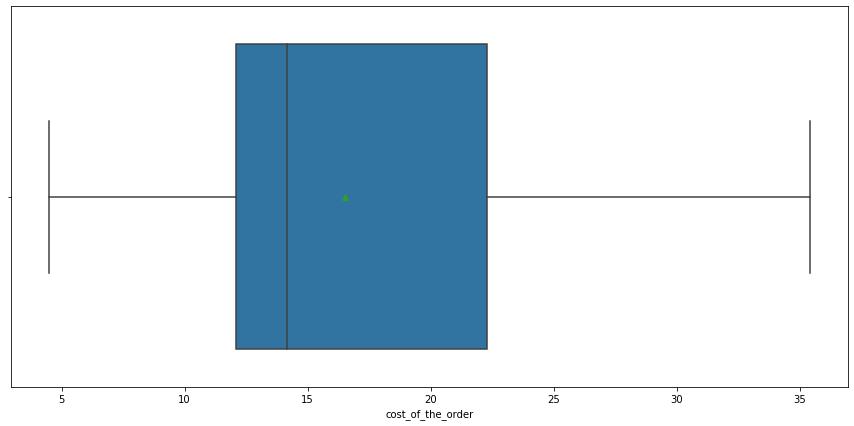

In [17]:
plt.figure(figsize = (15, 7))
sns.boxplot(data = df, x = "cost_of_the_order", showmeans = True)
plt.show()

### Delivery time

In [18]:
mean_del_time = df["delivery_time"].mean()
print("The average delivery time is " + str(mean_del_time) + " minutes.")

mean_prep_time = df["food_preparation_time"].mean()
print("The average time to prepare the order is " + str(mean_prep_time) + " minutes")

df["total_time"] = df["delivery_time"] + df["food_preparation_time"]
total_time_mean = df["total_time"].mean()
print("The average total time taken for an order to be received by the customer is " + str(total_time_mean) + " minutes")

The average delivery time is 24.161749209694417 minutes.
The average time to prepare the order is 27.371970495258168 minutes
The average total time taken for an order to be received by the customer is 51.53371970495258 minutes


In [19]:
min_t = df["total_time"].min()
max_t = df["total_time"].max()

print("The minimum time taken to deliver the food from the moment the order has been placed is", min_t,
      "minutes, and the maximum is", max_t, "minutes.")

The minimum time taken to deliver the food from the moment the order has been placed is 35 minutes, and the maximum is 68 minutes.


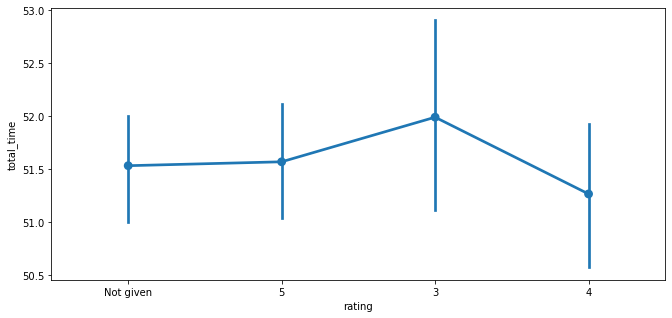

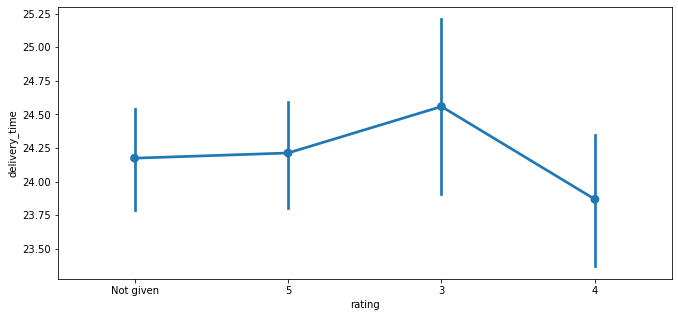

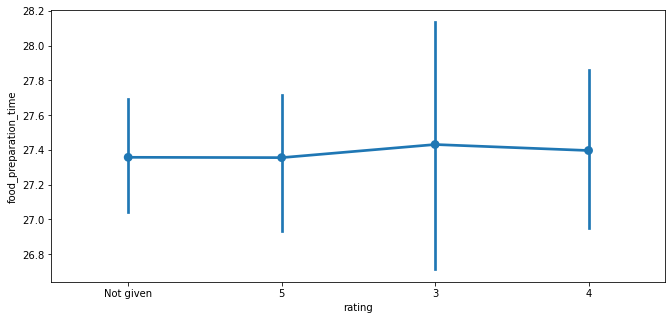

In [20]:
plt.figure(figsize = (11, 5))
sns.pointplot(data = df, x = "rating", y = "total_time")
plt.show()

plt.figure(figsize = (11,5))
sns.pointplot(data = df, x = "rating", y = "delivery_time")
plt.show()

plt.figure(figsize = (11,5))
sns.pointplot(data = df, x = "rating", y = "food_preparation_time")
plt.show()

### Observations: It appears that time taken to deliver the order doesn´t correlate much with overall client satisfaction

In [21]:
df["customer_id"].value_counts()[:5]

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

### Observations: These are the top five customers regarding total number of orders placed


## Multivariate analysis

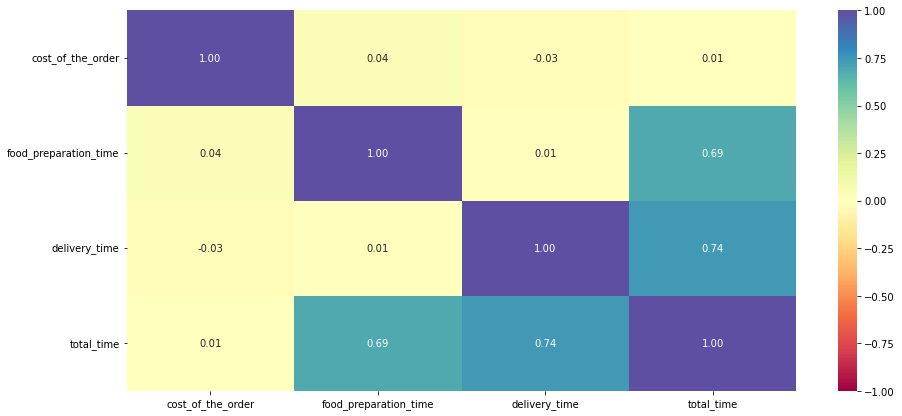

In [22]:
col_list = ["cost_of_the_order", "food_preparation_time", "delivery_time", "total_time"]
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Certainly, total time is highly correlated with food prep time and delivery but there are no other correlations between numerical variables in this dataset.

In [24]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [25]:
df["day_of_the_week"].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

In [26]:
df["day_of_the_week"].value_counts(1)

Weekend    0.711802
Weekday    0.288198
Name: day_of_the_week, dtype: float64

<AxesSubplot:xlabel='day_of_the_week', ylabel='delivery_time'>

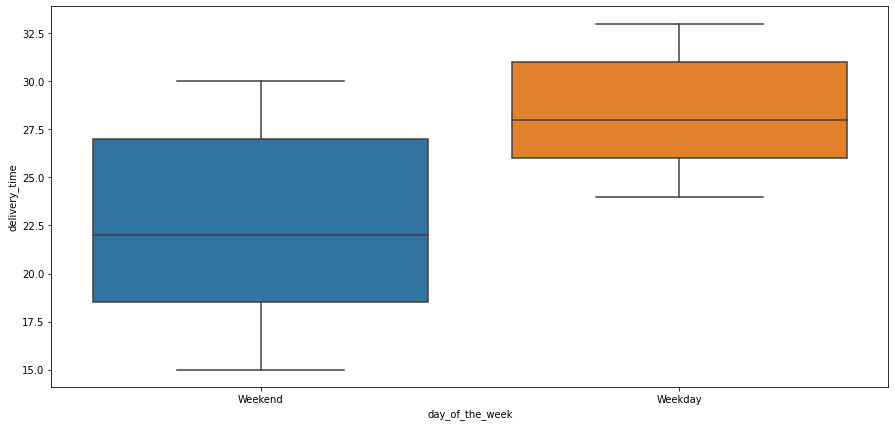

In [26]:
plt.figure(figsize = (15, 7))
sns.boxplot(data = df, x = "day_of_the_week", y = "delivery_time") 

### Observations: 71% of the orders where made during weekend. During weekdays, the delivery time increases and tends to be around 27 to 30 minutes whereas it could take around 20 minutes during weekends.

<AxesSubplot:xlabel='cuisine_type', ylabel='food_preparation_time'>

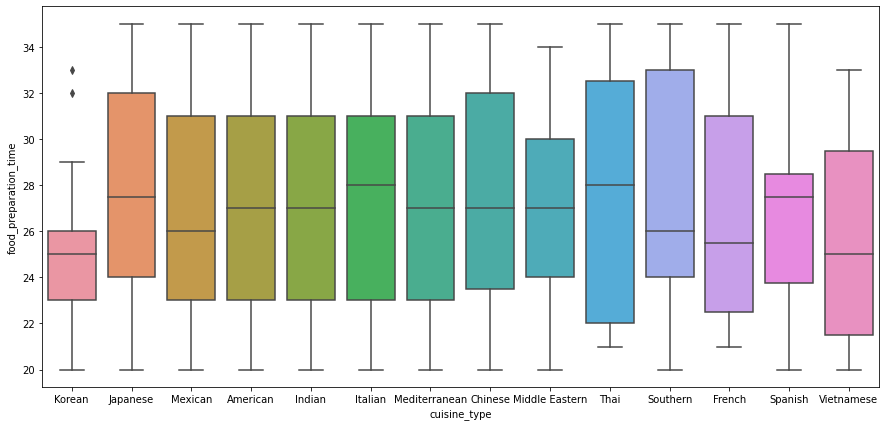

In [27]:
plt.figure(figsize = (15, 7))

sns.boxplot(data = df, x = "cuisine_type", y = "food_preparation_time")

<AxesSubplot:xlabel='cuisine_type', ylabel='cost_of_the_order'>

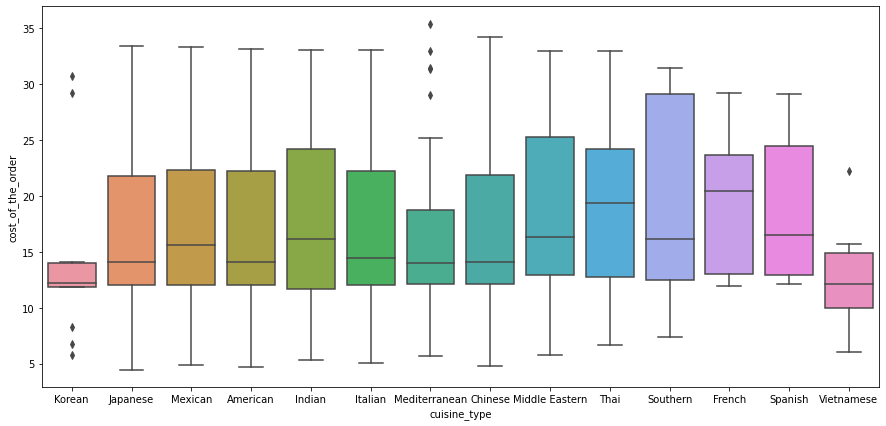

In [28]:
plt.figure(figsize = (15, 7))

sns.boxplot(data = df, x = "cuisine_type", y = "cost_of_the_order")

In [29]:
plt.figure(figsize = (15, 7))
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(15)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Momoya                            492.13
Name: cost_of_the_order, dtype: float64

<Figure size 1080x504 with 0 Axes>

In [30]:
plt.figure(figsize = (15, 7))
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = True).head(15)

restaurant_name
Hunan Manor                       5.72
Cipriani Le Specialita            5.92
Big Wong Restaurant _¤¾Ñ¼        5.92
Wa Jeal                           6.74
Market Table                      6.79
La Follia                         8.05
'wichcraft                        8.10
Woorijip                          8.25
Chola Eclectic Indian Cuisine     8.73
Gaia Italian Cafe                 8.78
Lamarca Pasta                     9.22
Balade                            9.22
Samurai Mama                     11.64
Frank Restaurant                 12.08
The MasalaWala                   12.13
Name: cost_of_the_order, dtype: float64

<Figure size 1080x504 with 0 Axes>

### Conclusion and Recommendations

### Conclusions:
*  The dataset consists of 1898 data entries and 9 columns. There are no null values present in the dataset.

* The average amount paid for an order is $16, but it can go as high as $35. The average time taken for an order to be received by the customer is 51.53 minutes, which includes the food preparation time and delivery time.

* The dataset consists of 178 restaurants and 14 cuisine types.

* 29.24% of the orders cost more than $20.

* The average delivery time is 24.16 minutes, and the average time to prepare the order is 27.37 minutes. The minimum time taken to deliver the food from the moment the order has been placed is 35 minutes, and the maximum is 68 minutes.

* It appears that time taken to deliver the order doesn´t correlate much with overall client satisfaction. There are no significant correlations between numerical variables in this dataset, except for the positive correlation between food preparation time and cost.

* 71% of the orders were made during the weekend. During weekdays, the delivery time tends to be around 27 to 30 minutes, whereas it could take around 20 minutes during weekends.

* 38% of the orders were not rated.

### Recommendations:

*  The high percentage of unrated orders could indicate that the customers are not being asked to rate their experience. It is recommended that the restaurant owners encourage customers to rate their experience by providing incentives or creating a loyalty program.

* The high preparation and delivery times could negatively impact the customer experience. The restaurant owners should consider optimizing their operations to reduce the time taken to prepare and deliver the orders.

* The positive correlation between food preparation time and cost could indicate that customers are willing to pay more for quicker preparation times. The restaurant owners should consider offering options for faster preparation times at a premium price to cater to customers who value quicker service.

* The longer delivery times during weekdays compared to weekends could indicate that the restaurant owners may not have enough staff to cater to the demand during peak hours. It is recommended that the owners hire more staff during peak hours to reduce delivery times and improve the customer experience.

* The lack of correlation between delivery time and satisfaction ratings indicates that delivery time may not be the most critical factor influencing customer satisfaction. It is recommended that the restaurant owners conduct a survey to understand what factors influence customer satisfaction and make improvements accordingly.

* The owners could consider analyzing the data for each restaurant and cuisine type to identify trends and opportunities for improvement at the individual restaurant level.